In [1]:
import os
os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
def read_file(filename):
    contents, labels = [], []
    with open(filename,encoding='utf-8') as f:
        for line in f:
            try:
                label, content = line.strip().split('\t')
                if content:
                    contents.append((content))
                    labels.append(label)
            except:
                pass
    return contents, labels

In [3]:
test_content,test_label = read_file(r'F:\NNNNNNNNNNNNNNLP\dataSet\cnews.test.txt')
train_content,train_label = read_file(r'F:\NNNNNNNNNNNNNNLP\dataSet\cnews.train.txt')
print(train_label[:10])

['体育', '体育', '体育', '体育', '体育', '体育', '体育', '体育', '体育', '体育']


In [4]:
import re
def clear_character(sentence):
    pattern1= '\[.*?\]'     
    pattern2 = re.compile('[^\u4e00-\u9fa5^a-z^A-Z^0-9]')   
    line1=re.sub(pattern1,'',sentence)
    line2=re.sub(pattern2,'',line1)   
    new_sentence=''.join(line2.split())
    return new_sentence

In [5]:
tr_text=list(map(lambda s: clear_character(s), train_content))
te_text=list(map(lambda s: clear_character(s), test_content))
print(tr_text[1])

商瑞华首战复仇心切中国玫瑰要用美国方式攻克瑞典多曼来了瑞典来了商瑞华首战求3分的信心也来了距离首战72小时当口中国女足彻底从恐瑞症当中获得解脱因为商瑞华已经找到了瑞典人的软肋找到软肋保密4月20日奥运会分组抽签结果出来后中国姑娘就把瑞典锁定为关乎奥运成败的头号劲敌因为除了浦玮等个别老将之外现役女足将士竟然没有人尝过击败瑞典的滋味在中瑞两队共计15次交锋的历史上中国队6胜3平6负与瑞典队平分秋色但从2001年起至今近8年时间中国在同瑞典连续5次交锋中均未尝胜绩战绩为2平3负尽管八年不胜瑞典曾一度成为谢亚龙聘请多曼斯基的理由之一但这份战绩表也成为压在姑娘们身上的一座大山在奥运备战过程中越发凸显沉重或许正源于此商瑞华才在首战前3天召开了一堂完全针对恐瑞症的战术分析课3日中午在喜来登大酒店中国队租用的会议室里商瑞华给大家播放了瑞典队的比赛录像剪辑这是7月6日瑞典在主场同美国队进行的一场奥运热身赛当时美国队头牌射手瓦姆巴赫还没有受伤比赛当中双方均尽遣主力占据主场优势的瑞典队曾一度占据上风但终究还是在定位球防守上吃了亏美国队在下半场的一次角球配合中通过远射打进唯一进球尽管慢动作显示是打在瑞典队后卫腿上弹射入网但从过程到结果均显示了相同内容瑞典队的防守并非无懈可击商瑞华让科研教练曹晓东等人对这场比赛进行精心剪辑尤其是瑞典队失球以及美国队形成有威胁射门的片段更是被放大进行动作分解每一个中国姑娘都可以一目了然地看清瑞典队哪些地方有机可乘甚至之前被商瑞华称为恐怖杀手的瑞典8号谢琳也在这次战术分解过程中被发现了不足之处姑娘们心知肚明并开心享受对手软肋被找到的欢悦但却必须对记者保密某主力球员说这可不能告诉外界反正我们心里有数了知道对付这个速度奇快的谢琳该怎么办老帅的瑞典情结就像中国队8年不胜瑞典一样瑞典队也连续遭遇对美国队的溃败去年阿尔加夫杯瑞典0比1不敌美国世界杯小组赛上瑞典0比2被美国完胜今年阿尔加夫杯美国人再次击败瑞典算上7月6日一役瑞典遇到美国连平局都没有竟然是4连败3日中午的这堂战术分析课后用美国人的方式击败瑞典已经成为中国女足将士的共同心声姑娘们当然有理由这样去憧憬因为在7月30日奥运会前最后一场热身赛中中国女足便曾0比0与强大的美国队握手言和在3日中午的战术分析课上这场中美热身也被梳理出片段与姑娘们一道完成总结点评过程中商瑞华对大家在同美国队比赛中表现出来的逼抢意识给予很高评

In [6]:
import jieba
tr_seg_text=list(map(lambda s: jieba.lcut(s), tr_text))
te_seg_text=list(map(lambda s: jieba.lcut(s), te_text))

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\86178\AppData\Local\Temp\jieba.cache
Loading model cost 0.547 seconds.
Prefix dict has been built successfully.


In [7]:
print(tr_seg_text[1][:20])

['商瑞华', '首战', '复仇', '心切', '中国', '玫瑰', '要', '用', '美国', '方式', '攻克', '瑞典', '多曼来', '了', '瑞典', '来', '了', '商瑞华', '首战', '求']


In [8]:
# 停用词
stopwords = [] 
with open(r"F:\NNNNNNNNNNNNNNLP\dataSet\stop_words.txt",encoding='utf-8') as f:
        for line in f:
            stopwords.append(line.replace('\n', ''))
print(stopwords[:10])

['', '`', '^', '~', '<', '=', '>', '|', '_', '-']


In [9]:
def drop_stopwords(line, stopwords):
    #根据停顿词表，去除句子中的停顿词
    line_clean = []
    for word in line:
        if word in stopwords:
            continue
        line_clean.append(word)
    return line_clean
# 由于文本较大，去除停用词部分需要时间较长，大概6分钟左右
tr_st_text=list(map(lambda s: drop_stopwords(s,stopwords), tr_seg_text))
te_st_text=list(map(lambda s: drop_stopwords(s,stopwords), te_seg_text))
# 展示去除停顿词后的文本
print((tr_st_text[1][:20]))
print("去除停顿词前，该文本共有{}个词".format(len(tr_seg_text[1])))
print("去除停顿词后，该文本共有{}个词".format(len(tr_st_text[1])))

['商瑞华', '首战', '复仇', '心切', '中国', '玫瑰', '美国', '方式', '攻克', '瑞典', '多曼来', '瑞典', '商瑞华', '首战', '求', '分', '信心', '距离', '首战', '72']
去除停顿词前，该文本共有834个词
去除停顿词后，该文本共有518个词


In [11]:
from collections import Counter
def build_vocab(data_train, vocab_dir):
    """根据训练集构建词汇表，只保留在训练集中最常出现的5000个词"""
    vocab_size=5000 #保留的词汇数目
    all_data = []
    for content in data_train:
        all_data.extend(content)

    counter = Counter(all_data)
    #print(counter.most_common)
    count_pairs = counter.most_common(vocab_size-2)
    words, _ = list(zip(*count_pairs))
    # 添加<PAD>用来保证文本有同样的长度，<UNK>用来表示词汇表中没有出现的词
    words = ['<PAD>'] +['<UNK>']+ list(words)
    #print(words)
    return words
    #open_file(vocab_dir, mode='w').write('\n'.join(words) + '\n')
word_to_id1 = build_vocab(tr_st_text,_)
word_to_id = dict(zip(word_to_id1,range(len(word_to_id1))))
# 展示词汇表内容
print(word_to_id)

{'<PAD>': 0, '<UNK>': 1, '都': 2, '中': 3, '月': 4, '年': 5, '一个': 6, '上': 7, '不': 8, '中国': 9, '会': 10, '说': 11, '人': 12, '基金': 13, '日': 14, '还': 15, '很': 16, '后': 17, '市场': 18, '更': 19, '时': 20, '公司': 21, '美国': 22, '记者': 23, '时间': 24, '学生': 25, '游戏': 26, '北京': 27, '投资': 28, '最': 29, '好': 30, '分': 31, '新': 32, '大': 33, '电影': 34, '10': 35, '发展': 36, '做': 37, '下': 38, '项目': 39, '很多': 40, '银行': 41, '比赛': 42, '工作': 43, '去': 44, '留学': 45, '企业': 46, '大学': 47, '经济': 48, '选择': 49, '房地产': 50, '里': 51, '情况': 52, '元': 53, '前': 54, '新浪': 55, '国际': 56, '已': 57, '国家': 58, '发现': 59, '只': 60, '却': 61, '玩家': 62, '12': 63, '再': 64, '研究': 65, '看': 66, '高': 67, '希望': 68, '亿元': 69, '想': 70, '活动': 71, '小': 72, '申请': 73, '产品': 74, '影响': 75, '设计': 76, '包括': 77, '提供': 78, '生活': 79, '出': 80, '11': 81, '城市': 82, '学校': 83, '上海': 84, '导演': 85, '世界': 86, '英国': 87, '20': 88, '表现': 89, '价格': 90, '才': 91, '政策': 92, '相关': 93, '合作': 94, '一种': 95, '资金': 96, '显示': 97, '2009': 98, '国内': 99, '政府': 100, '超过': 101, '内': 102, '方式'

In [13]:
def read_category():
    """读取分类目录，在这个任务中分类目录固定为以下十种"""
    
    categories = ['体育', '财经', '房产', '家居', '教育', '科技', '时尚', '时政', '游戏', '娱乐']

    categories = [x for x in categories]

    cat_to_id = dict(zip(categories, range(len(categories))))
    print(cat_to_id)
    return categories, cat_to_id
# 展示每种类别对应的数字标签
categories,cat_to_id = read_category()

{'体育': 0, '财经': 1, '房产': 2, '家居': 3, '教育': 4, '科技': 5, '时尚': 6, '时政': 7, '游戏': 8, '娱乐': 9}


In [14]:
from tensorflow import keras
import tensorflow as tf
def process_test(contents,labels, word_to_id, cat_to_id,max_length = 400):
    """将文本转换为向量表示"""
    data_id, label_id = [], []
    for i in range(len(contents)):  
        idx = []
        for x in contents[i]:
            if x in word_to_id:
                # 当前词存在于词汇表中，把对应的数字填上
                idx.append(word_to_id[x])
            else:
                # 当前词不存在于词汇表中，填1
                idx.append(1)
        data_id.append(idx)
        label_id.append(cat_to_id[labels[i]])
        
    # 使用keras提供的pad_sequences来将文本填充为固定长度
    x_pad = keras.preprocessing.sequence.pad_sequences(data_id, max_length)
    y_pad = tf.keras.utils.to_categorical(label_id, num_classes=len(cat_to_id))  # 将标签转换为one-hot表示

    return x_pad, y_pad
x_pad1,y_pad1 = process_test(tr_st_text,train_label,word_to_id,cat_to_id)
te_x1,te_y1 = process_test(te_st_text,test_label,word_to_id,cat_to_id)
print(x_pad1.shape)
print(y_pad1.shape)

(50000, 400)
(50000, 10)


In [22]:
from keras.layers import Input, Embedding, Dense, LSTM, Flatten, Dropout, BatchNormalization, Bidirectional
from keras.models import Model
import keras.backend as backend
EMBED_SIZE = 100
input_layer = Input(shape=(400,), dtype='int32')
embedding = Embedding(5000, EMBED_SIZE, mask_zero=True)(input_layer)
bidirectional_lstm = Bidirectional(LSTM(50, return_sequences=False))(embedding)
dropout1 = Dropout(0.2)(bidirectional_lstm)
dense = Dense(30, activation='relu')(dropout1)
output = Dense(10, activation='softmax')(dense)
model1 = Model(inputs=[input_layer], outputs=[output])
model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model1.summary()

Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)    │ (None, 400)               │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ embedding_5 (Embedding)       │ (None, 400, 100)          │         500,000 │ input_layer_5[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ not_equal_5 (NotEqual)        │ (None, 400)               │               0 │ input_layer_5[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ bidirectional_4               │ (None, 100)               │          60,400 │ embedding_5[0][0],         │
│ (Bidirectional)               │                           │                 │ not_equal_5[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout_6 (Dropout)           │ (None, 100)               │               0 │ bidirectional_4[0][0]      │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_6 (Dense)               │ (None, 30)                │           3,030 │ dropout_6[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_7 (Dense)               │ (None, 10)                │             310 │ dense_6[0][0]              │
└───────────────────────────────┴───────────────────────────┴─────────────────┴────────────────────────────┘

 Total params: 563,740 (2.15 MB)

 Trainable params: 563,740 (2.15 MB)

 Non-trainable params: 0 (0.00 B)

In [24]:
import numpy as np

# 划分验证集的比例，这里设置为0.2，即20%的数据作为验证集，你可以根据实际需求调整这个比例
validation_split = 0.2

# 获取训练数据的样本数量
num_samples = len(x_pad1)

# 随机打乱训练数据的索引
indices = np.arange(num_samples)
np.random.shuffle(indices)

# 根据划分比例确定验证集的样本数量
num_val_samples = int(num_samples * validation_split)

# 划分出验证集的索引
val_indices = indices[:num_val_samples]
train_indices = indices[num_val_samples:]

# 根据索引划分出验证集和训练集（这里的x_pad1和y_pad1是训练集，val_x1和val_y1是验证集）
val_x1 = x_pad1[val_indices]
val_y1 = y_pad1[val_indices]
x_train = x_pad1[train_indices]
y_train = y_pad1[train_indices]

# 现在可以使用划分好的训练集和验证集来训练模型
history1 = model1.fit(x_train, y_train, epochs=7, batch_size=1000, validation_data=(val_x1, val_y1))

Epoch 1/7
40/40 ━━━━━━━━━━━━━━━━━━━━ 75s 2s/step - accuracy: 0.9589 - loss: 0.1624 - val_accuracy: 0.9551 - val_loss: 0.1764
Epoch 2/7
40/40 ━━━━━━━━━━━━━━━━━━━━ 75s 2s/step - accuracy: 0.9607 - loss: 0.1560 - val_accuracy: 0.9697 - val_loss: 0.1257
Epoch 3/7
40/40 ━━━━━━━━━━━━━━━━━━━━ 76s 2s/step - accuracy: 0.9740 - loss: 0.1036 - val_accuracy: 0.9686 - val_loss: 0.1235
Epoch 4/7
40/40 ━━━━━━━━━━━━━━━━━━━━ 83s 2s/step - accuracy: 0.9761 - loss: 0.0947 - val_accuracy: 0.9656 - val_loss: 0.1236
Epoch 5/7
40/40 ━━━━━━━━━━━━━━━━━━━━ 77s 2s/step - accuracy: 0.9780 - loss: 0.0872 - val_accuracy: 0.9689 - val_loss: 0.1218
Epoch 6/7
40/40 ━━━━━━━━━━━━━━━━━━━━ 80s 2s/step - accuracy: 0.9794 - loss: 0.0776 - val_accuracy: 0.9706 - val_loss: 0.1133
Epoch 7/7
40/40 ━━━━━━━━━━━━━━━━━━━━ 78s 2s/step - accuracy: 0.9861 - loss: 0.0598 - val_accuracy: 0.9667 - val_loss: 0.1312


In [25]:
results = model1.evaluate(te_x1, te_y1)
print('test_loss:', results[0], 'test_accuracy:', results[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 17s 23ms/step - accuracy: 0.9397 - loss: 0.2577
test_loss: 0.2529885172843933 test_accuracy: 0.9394000172615051


In [26]:
from sklearn import metrics
predicted_prob = model1.predict(te_x1)
print(predicted_prob)
predicted = [categories[np.argmax(pred)] for pred in 
             predicted_prob]
print(metrics.classification_report(test_label, predicted))

313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step
[[9.98165429e-01 3.94628063e-04 4.52121327e-07 ... 4.75548586e-06
  4.38797520e-04 5.45366811e-06]
 [9.98614788e-01 2.33641113e-04 2.75389027e-07 ... 2.62170443e-06
  3.22706532e-04 2.53962344e-06]
 [9.99121368e-01 1.50839347e-04 1.01753407e-07 ... 1.35009600e-06
  2.13964770e-04 1.65640904e-06]
 ...
 [3.02611152e-04 9.96893644e-01 8.55928738e-06 ... 2.09736871e-03
  2.00575698e-04 4.07401967e-04]
 [1.21417677e-03 9.96581018e-01 1.13733906e-04 ... 9.42442683e-04
  4.42901801e-04 4.26496641e-04]
 [2.31701866e-04 9.98529434e-01 1.34860729e-05 ... 7.06796709e-04
  1.87479236e-04 2.77870946e-04]]
              precision    recall  f1-score   support

          体育       0.99      0.99      0.99      1000
          娱乐       0.96      0.97      0.97      1000
          家居       0.94      0.77      0.84      1000
          房产       0.99      0.98      0.99      1000
          教育       0.94      0.84      0.89      1000
          时尚       0.93      0.97

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5]),
 [Text(0, 0.5, '0'),
  Text(0, 1.5, '1'),
  Text(0, 2.5, '2'),
  Text(0, 3.5, '3'),
  Text(0, 4.5, '4'),
  Text(0, 5.5, '5'),
  Text(0, 6.5, '6'),
  Text(0, 7.5, '7'),
  Text(0, 8.5, '8'),
  Text(0, 9.5, '9')])

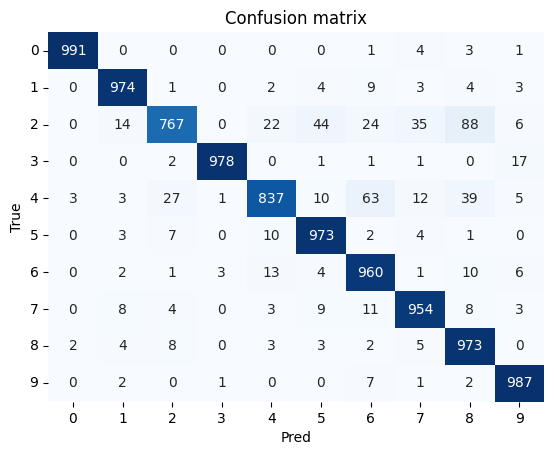

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
classes = np.unique(test_label)
## Plot confusion matrix
cm = metrics.confusion_matrix(test_label, predicted)
fig, ax = plt.subplots()
sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues, cbar=False)
ax.set(xlabel="Pred", ylabel="True", title="Confusion matrix")
plt.yticks(rotation=0)